# **ML Project**

# Load Data

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kiratsingh54/PortfolioProjects/main/Datasets/MoleculeSolubility.csv")
df

x variable = MolLogP, MolWt, NumRotatableBonds, AromaticProportion

y variable = LogS

This dataset is about the solubility of molecules in water or solvent and wheter it will be a good drug additive. I will be using the x variable to predict the y variable.

Since the y value is numerical, I will be building a regression model.

## Data separation as X and y

In [ ]:
y = df['logS']
y

In [ ]:
# Since I want to get rid of a column named 'logS' I specify 'axis=1' which lets the program to know to look for columns. Whereas, 'axis=0' would have made the program look 
# in row formation.
X = df.drop('logS', axis = 1)
X

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Specifying the random_state allows me to get the same split each test and test_size specifies that 20% of the data should be allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
X_train

In [ ]:
X_test

# Model Building

## Linear Regression

Training the model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)  # trains the empty regression model from sklearn on the dataset I have been working on



LinearRegression()

### Applying the model to make predictions

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

### Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.0075362951071338
LR R2 (Train):  0.7645051774668614
LR MSE (Test):  1.0206953660981828
LR R2 (Test):  0.7891616188538331


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

## Random Forest

### Training the model

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make predictions

In [49]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate model performance

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Linear regression', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

## Model comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop = True)
df_models

# Data visualization of prediction results

Text(0.5, 0, 'Experimental LogS')

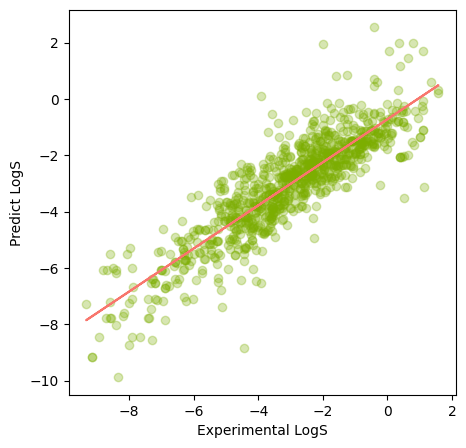

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# creating a scatter plot

plt.figure(figsize = (5,5))
plt.scatter(x = y_train, y = y_lr_train_pred, c = "#7CAE00", alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#F8766D")
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')